<a href="https://colab.research.google.com/github/jinglescode/python-signal-processing/blob/master/tutorials/Denoising%20with%20mean-smooth%20filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising with mean-smooth filter

In the [previous tutorial](https://colab.research.google.com/github/jinglescode/python-signal-processing/blob/master/tutorials/Signal%20composition%20-%20time%2C%20sampling%20rate%20and%20frequency.ipynb), we learned that a signal could contain noise. In this tutorial, we will see how the running mean filter can perform denoising.



## Load packages

We will download [splearn](https://github.com/jinglescode/python-signal-processing), a package that consists of datasets, common signal processing functions and machine learning model architectures.

In [1]:
#@title 
!git clone https://github.com/jinglescode/python-signal-processing.git
%cd python-signal-processing
!pip install -r requirements.txt --quiet

Cloning into 'python-signal-processing'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 39 (delta 14), reused 16 (delta 2), pack-reused 0
Unpacking objects: 100% (39/39), done.
/content/python-signal-processing


In [2]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy

from splearn.data.generate import signal # https://github.com/jinglescode/python-signal-processing/blob/master/splearn/data/generate.py

## Introduction

The running mean filter (or the means moving filter) works by setting each data point in the filtered signal to be an average of the original signal's surrounding points. 

For example, these are the data points in our signals, `[3, 4, 7, 2, 3, 6, 5]`. After applying a mean-smoothed filter, the value of each point is an average of the data point, `k` data point before, and `k` data point after. The number of data points we use to compute the average value is the `order of the filter`. For example, we use`k=1`, the average value of `[3, 4, 7]` is `4.6`. 

In this graph, the blue line is the signal, and the orange line is the smoothed version of this signal. 

Mean of [3, 4, 7] is 4.666666666666667
Mean of [4, 7, 2] is 4.333333333333333
Mean of [7, 2, 3] is 4.0
Mean of [2, 3, 6] is 3.6666666666666665
Mean of [3, 6, 5] is 4.666666666666667


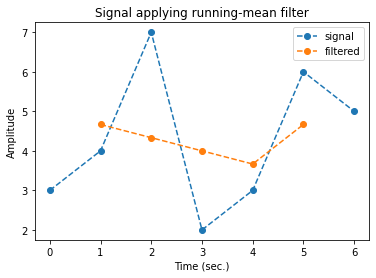

In [3]:
#@title 
s1 = [3, 4, 7, 2, 3, 6, 5]

n = len(s1)

filtered_s1 = [None] * n

k = 1 # filter window is k*2+1
for i in range(k,n-k):
    print('Mean of', s1[i-k:i+k+1], 'is', np.mean(s1[i-k:i+k+1]))
    filtered_s1[i] = np.mean(s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Signal applying running-mean filter')
plt.show()

## Edge effects

You may have noticed the missing values at the start and end of the filtered signal; these are called edge effects. We will see these edge effects every time you apply a temporal filter through any signals regardless of the type of filter.

So, what do we do with these edge points? There are a few common approaches.

- we can ignore them, like the graph above, we have `k*2` missing points where `k` is the filter size
- we can set it as the original signal
- we can pad the signal with `k` zeros infront and at the back of the signal.

There isn't a best or optimal way to deal with edge effects. We have to figure out what's the best way on a case-by-case basis.

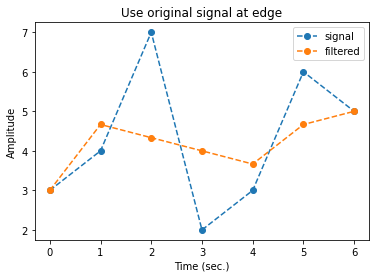

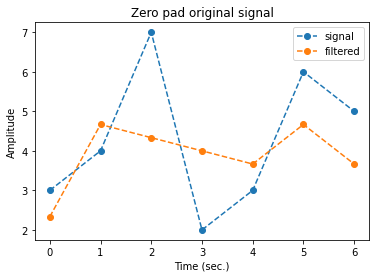

In [4]:
#@title 
s1 = [3, 4, 7, 2, 3, 6, 5]

n = len(s1)

filtered_s1 = copy.deepcopy(s1)

k = 1
for i in range(k,n-k):
    filtered_s1[i] = np.mean(s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Use original signal at edge')
plt.show()

#####

padded_s1 = [0, 3, 4, 7, 2, 3, 6, 5, 0]

n = len(padded_s1)

filtered_s1 = [None] * n

k = 1
for i in range(k,n-k):
    filtered_s1[i-1] = np.mean(padded_s1[i-k:i+k+1])

plt.plot(s1, '--o', label='signal')
plt.plot(filtered_s1, '--o', label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Zero pad original signal')
plt.show()

## Example with a slightly more complicated signal

Here we create a simple 1-Hz signal, on a sampling rate of 100. Then we add lots of noise, so much so that you don't see the 1-Hz signals anymore. 

We apply a running mean filter on the time domain, with `k=10`; this will use the surrounding 21 points to compute each point's average value.

The graph below shows the original signal (blue line) and the filtered signal (orange line). I have also plotted the original 1-Hz signal for comparison. 

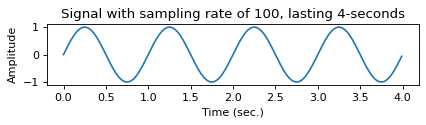

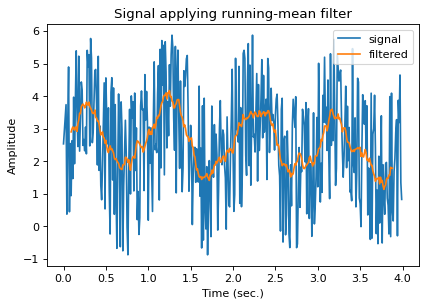

In [5]:
sampling_rate = 100
duration = 4

# generate 1-Hz signal for comparison
figure(num=None, figsize=(6, 1), dpi=80, facecolor='w', edgecolor='k')
signal_1hz = signal(
    length_seconds=duration, 
    sampling_rate=sampling_rate, 
    frequencies=[1],
    plot=True
)
plt.show()

# generate a noisy signal
signal_noisy = signal(
    length_seconds=duration, 
    sampling_rate=sampling_rate, 
    frequencies=[1],
    add_noise=5,
)

time  = np.arange(0,duration,1/sampling_rate)
n = len(signal_noisy)

# apply running mean filter
filtered_signal = [None] * n
k = 10
for i in range(k,n-k):
    filtered_signal[i-1] = np.mean(signal_noisy[i-k:i+k+1])

# plot signals
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time, signal_noisy, label='signal')
plt.plot(time, filtered_signal, label='filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Signal applying running-mean filter')
plt.show()

Interestingly, the filtered signal isn't too far off from the 1-Hz signal. Though it is not perfectly smooth like the original 1-Hz signal, we can clearly see 4 oscillations. If you want a smoother filtered signal, you could increase `k` parameter.

We can also notice the edge effects; you can choose to ignore it, thus removing them from the signal, like what we have done here.

## When to use the running mean filter?

A running mean filter is a beneficial filter when the noise is normally distributed, that is when noise is distributed positively and negatively relative to the signal of interest. We will explore other filters in the [next tutorials](https://github.com/jinglescode/python-signal-processing/tree/master/tutorials).

# Endnotes

Thanks for checking out this tutorial. I hope it has been helpful. If you find any mistakes or have any questions, please do not hesitate to [submit an issue](https://github.com/jinglescode/python-signal-processing/issues). Feel free to connect with me on [GitHub](https://github.com/jinglescode) and [LinkedIn](https://www.linkedin.com/in/jingles).

## Extras

`signal` function is used in this repo and it is taken from [splearn.data.generate](https://github.com/jinglescode/python-signal-processing/blob/master/splearn/data/generate.py).

In [6]:
# -*- coding: utf-8 -*-
"""Generate signals
"""
import numpy as np
import matplotlib.pyplot as plt


def signal(length_seconds, sampling_rate, frequencies, func="sin", add_noise=0, plot=False):
    r"""
    Generate a n-D array, `length_seconds` seconds signal at `sampling_rate` sampling rate.
    
    Args:
        length_seconds : float
            Duration of signal in seconds (i.e. `10` for a 10-seconds signal, `3.5` for a 3.5-seconds signal)
        sampling_rate : int
            The sampling rate of the signal.
        frequencies : 1 or 2 dimension python list a floats
            An array of floats, where each float is the desired frequencies to generate (i.e. [5, 12, 15] to generate a signal containing a 5-Hz, 12-Hz and 15-Hz)
            2 dimension python list, i.e. [[5, 12, 15],[1]], to generate a signal with 2 channels, where the second channel containing 1-Hz signal
        func : string, optional, default: sin
            The periodic function to generate signal, either `sin` or `cos`
        add_noise : float, optional, default: 0
            Add random noise to the signal, where `0` has no noise
        plot : boolean, optional, default: False
            Plot the generated signal
    
    Returns:
        signal : n-d ndarray
            Generated signal, a numpy array of length `sampling_rate*length_seconds`
    Usage:
        >>> s = signal(length_seconds=4, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[2], 
        >>>     plot=True
        >>> )
        >>> 
        >>> s = signal(length_seconds=4, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[1,2], 
        >>>     func="cos", 
        >>>     add_noise=0.5, 
        >>>     plot=True
        >>> )
        >>> 
        >>> s = signal(length_seconds=3.5, 
        >>>     sampling_rate=100, 
        >>>     frequencies=[[1,2],[1],[2]],  
        >>>     plot=True
        >>> )
    """
    
    frequencies = np.array(frequencies, dtype=object)
    assert len(frequencies.shape) == 1 or len(frequencies.shape) == 2, "frequencies must be 1d or 2d python list"
    
    expanded = False
    if isinstance(frequencies[0], int):
        frequencies = np.expand_dims(frequencies, axis=0)
        expanded = True
    
    sampling_rate = int(sampling_rate)
    npnts = int(sampling_rate*length_seconds)  # number of time samples
    time = np.arange(0, npnts)/sampling_rate
    signal = np.zeros((frequencies.shape[0],npnts))
    
    for channel in range(0,frequencies.shape[0]):
        for fi in frequencies[channel]:
            if func == "cos":
                signal[channel] = signal[channel] + np.cos(2*np.pi*fi*time)
            else:
                signal[channel] = signal[channel] + np.sin(2*np.pi*fi*time)
    
        # normalize
        max = np.repeat(signal[channel].max()[np.newaxis], npnts)
        min = np.repeat(signal[channel].min()[np.newaxis], npnts)
        signal[channel] = (2*(signal[channel]-min)/(max-min))-1
    
    if add_noise:        
        noise = np.random.uniform(low=0, high=add_noise, size=(frequencies.shape[0],npnts))
        signal = signal + noise

    if plot:
        plt.plot(time, signal.T)
        plt.title('Signal with sampling rate of '+str(sampling_rate)+', lasting '+str(length_seconds)+'-seconds')
        plt.xlabel('Time (sec.)')
        plt.ylabel('Amplitude')
        plt.show()
    
    if expanded:
        signal = signal[0]
        
    return signal